In [2]:
!pip install networkx matplotlib

DEFINIMOS ARBOL DE 30 NUMEROS

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

class TreeNode:
    def __init__(self, value=0, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

def array_to_tree(arr, index=0):
    if index >= len(arr) or arr[index] is None:
        return None

    root = TreeNode(arr[index])
    root.left = array_to_tree(arr, 2 * index + 1)
    root.right = array_to_tree(arr, 2 * index + 2)

    return root

def add_edges(graph, root, pos=None, level=0, h_gap=1):
    if root is not None:
        if pos is None:
            pos = (0, 0)
        graph.add_node(root.value, pos=pos)
        if root.left:
            l_pos = (pos[0] - h_gap / (level + 1), pos[1] - 1)
            graph.add_edge(root.value, root.left.value)
            add_edges(graph, root.left, l_pos, level + 1, h_gap)
        if root.right:
            r_pos = (pos[0] + h_gap / (level + 1), pos[1] - 1)
            graph.add_edge(root.value, root.right.value)
            add_edges(graph, root.right, r_pos, level + 1, h_gap)

def draw_tree(root):
    graph = nx.DiGraph()
    add_edges(graph, root)
    pos = nx.get_node_attributes(graph, 'pos')
    labels = {n: n for n in graph.nodes()}

    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, labels=labels, with_labels=True, arrows=False, node_size=3000, node_color='lightblue', font_size=10, font_color='black')
    plt.show()

# Definir el arreglo de 30 números
arr = list(range(1, 31))

# Convertir el arreglo a un árbol binario
root = array_to_tree(arr)

# Graficar el árbol
draw_tree(root)


Búsqueda en anchura (BFS)

In [6]:
def bfs(root, target):
    if not root:
        return None

    queue = deque([root])
    while queue:
        node = queue.popleft()
        print(f"Visitando nodo: {node.value}")
        if node.value == target:
            return node

        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)

    return None

# Ejecutar la búsqueda en anchura
target_value = 30
found_node = bfs(root, target_value)

if found_node:
    print(f"Nodo con valor {target_value} encontrado: {found_node.value}")
else:
    print(f"Nodo con valor {target_value} no encontrado.")


Visitando nodo: 1
Visitando nodo: 2
Visitando nodo: 3
Visitando nodo: 4
Visitando nodo: 5
Visitando nodo: 6
Visitando nodo: 7
Visitando nodo: 8
Visitando nodo: 9
Visitando nodo: 10
Visitando nodo: 11
Visitando nodo: 12
Visitando nodo: 13
Visitando nodo: 14
Visitando nodo: 15
Visitando nodo: 16
Visitando nodo: 17
Visitando nodo: 18
Visitando nodo: 19
Visitando nodo: 20
Visitando nodo: 21
Visitando nodo: 22
Visitando nodo: 23
Visitando nodo: 24
Visitando nodo: 25
Visitando nodo: 26
Visitando nodo: 27
Visitando nodo: 28
Visitando nodo: 29
Visitando nodo: 30
Nodo con valor 30 encontrado: 30


Búsqueda en profundidad (DFS)

In [7]:
def dfs(root, target):
    if not root:
        return None

    stack = [root]
    while stack:
        node = stack.pop()
        print(f"Visitando nodo: {node.value}")
        if node.value == target:
            return node

        if node.right:
            stack.append(node.right)
        if node.left:
            stack.append(node.left)

    return None

# Ejecutar la búsqueda en profundidad
target_value = 15
found_node = dfs(root, target_value)

if found_node:
    print(f"Nodo con valor {target_value} encontrado: {found_node.value}")
else:
    print(f"Nodo con valor {target_value} no encontrado.")


Visitando nodo: 1
Visitando nodo: 2
Visitando nodo: 4
Visitando nodo: 8
Visitando nodo: 16
Visitando nodo: 17
Visitando nodo: 9
Visitando nodo: 18
Visitando nodo: 19
Visitando nodo: 5
Visitando nodo: 10
Visitando nodo: 20
Visitando nodo: 21
Visitando nodo: 11
Visitando nodo: 22
Visitando nodo: 23
Visitando nodo: 3
Visitando nodo: 6
Visitando nodo: 12
Visitando nodo: 24
Visitando nodo: 25
Visitando nodo: 13
Visitando nodo: 26
Visitando nodo: 27
Visitando nodo: 7
Visitando nodo: 14
Visitando nodo: 28
Visitando nodo: 29
Visitando nodo: 15
Nodo con valor 15 encontrado: 15


ARBOL BINARIO


In [10]:
import matplotlib.pyplot as plt
import networkx as nx

class TreeNode:
    def __init__(self, value=0, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

class BinaryTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        if self.root is None:
            self.root = TreeNode(value)
        else:
            self._insert_recursive(self.root, value)

    def _insert_recursive(self, node, value):
        if value < node.value:
            if node.left is None:
                node.left = TreeNode(value)
            else:
                self._insert_recursive(node.left, value)
        else:
            if node.right is None:
                node.right = TreeNode(value)
            else:
                self._insert_recursive(node.right, value)

    def search(self, value):
        return self._search_recursive(self.root, value)

    def _search_recursive(self, node, value):
        if node is None or node.value == value:
            return node
        if value < node.value:
            return self._search_recursive(node.left, value)
        return self._search_recursive(node.right, value)

    def draw_tree(self):
        if self.root is None:
            print("El árbol está vacío")
            return

        graph = nx.DiGraph()
        self._add_edges(graph, self.root)
        pos = nx.get_node_attributes(graph, 'pos')
        labels = {n: n for n in graph.nodes()}

        plt.figure(figsize=(12, 8))
        nx.draw(graph, pos, labels=labels, with_labels=True, arrows=False, node_size=3000, node_color='lightblue', font_size=10, font_color='black')
        plt.show()

    def _add_edges(self, graph, root, pos=None, level=0, h_gap=1):
        if root is not None:
            if pos is None:
                pos = (0, 0)
            graph.add_node(root.value, pos=pos)
            if root.left:
                l_pos = (pos[0] - h_gap / (level + 1), pos[1] - 1)
                graph.add_edge(root.value, root.left.value)
                self._add_edges(graph, root.left, l_pos, level + 1, h_gap)
            if root.right:
                r_pos = (pos[0] + h_gap / (level + 1), pos[1] - 1)
                graph.add_edge(root.value, root.right.value)
                self._add_edges(graph, root.right, r_pos, level + 1, h_gap)

# Crear un árbol binario y agregar nodos
binary_tree = BinaryTree()
nodes_to_insert = [15, 10, 20, 5, 12, 16, 25, 1, 9,6,22,11]

for node in nodes_to_insert:
    binary_tree.insert(node)

# Graficar el árbol binario
binary_tree.draw_tree()


ALGORITMO DE DIJKSTRA

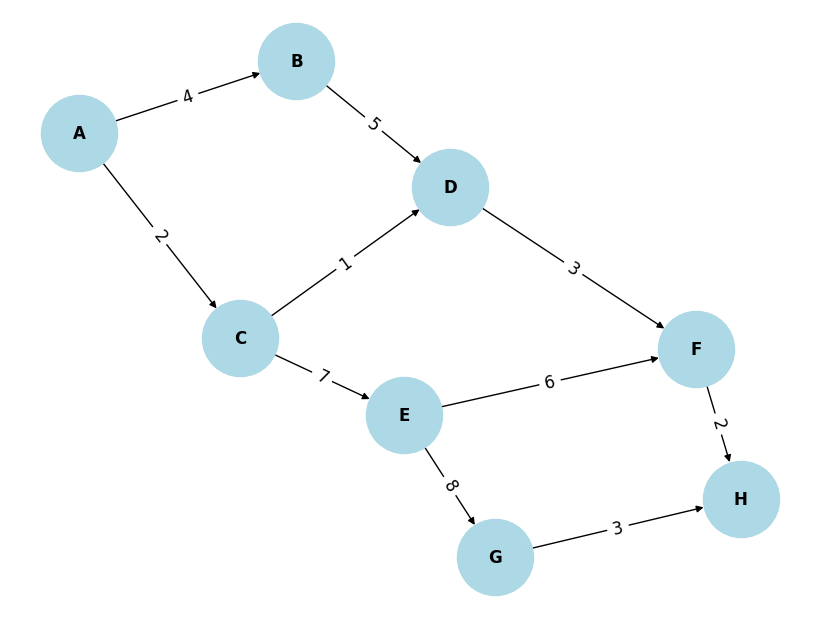

Caminos más cortos desde el nodo A:
Nodo A: Distancia 0, Predecesor A
Nodo B: Distancia 4, Predecesor A
Nodo C: Distancia 2, Predecesor A
Nodo D: Distancia 3, Predecesor C
Nodo E: Distancia 9, Predecesor C
Nodo F: Distancia 6, Predecesor D
Nodo G: Distancia 17, Predecesor E
Nodo H: Distancia 8, Predecesor F


In [24]:
import matplotlib.pyplot as plt
import networkx as nx

# Definir el grafo y agregar nodos y aristas
G = nx.DiGraph()
edges = [
    ('A', 'B', 4), ('A', 'C', 2), ('B', 'D', 5),
    ('C', 'D', 1), ('C', 'E', 7), ('D', 'F', 3),
    ('E', 'F', 6), ('E', 'G', 8), ('F', 'H', 2),
    ('G', 'H', 3)
]
G.add_weighted_edges_from(edges)

# Función para visualizar el grafo
def draw_graph(G, pos, labels=None, edge_labels=None):
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_color='black', font_weight='bold')
    if labels:
        nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color='black')
    if edge_labels:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
    plt.show()

# Visualizar el grafo original
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')
draw_graph(G, pos, edge_labels=edge_labels)

# Implementar el algoritmo de Dijkstra
def dijkstra(G, start):
    shortest_paths = {node: (float('inf'), None) for node in G.nodes}
    shortest_paths[start] = (0, start)
    visited = set()

    while visited != set(G.nodes):
        current_node = min((node for node in shortest_paths if node not in visited), key=lambda node: shortest_paths[node][0])
        visited.add(current_node)
        current_distance = shortest_paths[current_node][0]

        for neighbor in G.neighbors(current_node):
            weight = G[current_node][neighbor]['weight']
            distance = current_distance + weight

            if distance < shortest_paths[neighbor][0]:
                shortest_paths[neighbor] = (distance, current_node)

    return shortest_paths

# Ejecutar Dijkstra desde el nodo 'A'
start_node = 'A'
shortest_paths = dijkstra(G, start_node)

# Visualizar el resultado de Dijkstra
print(f"Caminos más cortos desde el nodo {start_node}:")
for node, (dist, pred) in shortest_paths.items():
    print(f"Nodo {node}: Distancia {dist}, Predecesor {pred}")

# Dibujar los caminos más cortos
shortest_path_edges = []
for node, (dist, pred) in shortest_paths.items():
    if pred is not None and pred != node:
        shortest_path_edges.append((pred, node))

shortest_path_graph = nx.DiGraph()
shortest_path_graph.add_edges_from(shortest_path_edges)

draw_graph(shortest_path_graph, pos)


PILAS CON LISTAS

In [26]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def is_empty(self):
        return self.head is None

    def insert_at_end(self, data):
        new_node = Node(data)
        if self.is_empty():
            self.head = new_node
        else:
            current = self.head
            while current.next:
                current = current.next
            current.next = new_node

    def remove_from_front(self):
        if self.is_empty():
            return None
        else:
            removed_data = self.head.data
            self.head = self.head.next
            return removed_data

    def size(self):
        count = 0
        current = self.head
        while current:
            count += 1
            current = current.next
        return count

    def get_order(self):
        order = []
        current = self.head
        while current:
            order.append(current.data)
            current = current.next
        return order

# Creamos una lista enlazada para almacenar nombres
linked_list = LinkedList()

# Agregamos nombres a la lista enlazada
nombres = ["Juan", "María", "Carlos", "Ana", "Pedro", "Luisa", "David", "Elena", "Miguel", "Sofía",
           "Diego", "Laura", "Pablo", "Isabel", "Andrés", "Claudia", "Javier", "Valeria", "Roberto", "Lucía"]

for nombre in nombres:
    linked_list.insert_at_end(nombre)

# Mostramos la cantidad de personas en la fila
print("Cantidad de personas en la fila:", linked_list.size())

# Mostramos el orden de las personas en la fila
print("Orden de las personas en la fila:", linked_list.get_order())

# Mostramos el próximo nombre en la fila (el primero en llegar)
print("Próximo en la fila:", linked_list.head.data)

# Sacamos a la próxima persona de la fila (el primero en llegar)
persona_atendida = linked_list.remove_from_front()
print("Persona atendida:", persona_atendida)

# Mostramos la cantidad de personas en la fila después de atender a una persona
print("Cantidad de personas en la fila:", linked_list.size())


Cantidad de personas en la fila: 20
Orden de las personas en la fila: ['Juan', 'María', 'Carlos', 'Ana', 'Pedro', 'Luisa', 'David', 'Elena', 'Miguel', 'Sofía', 'Diego', 'Laura', 'Pablo', 'Isabel', 'Andrés', 'Claudia', 'Javier', 'Valeria', 'Roberto', 'Lucía']
Próximo en la fila: Juan
Persona atendida: Juan
Cantidad de personas en la fila: 19


MISMO EJEMPLO USANDO COLAS

In [28]:
from collections import deque

# Creamos una cola para almacenar nombres
cola_nombres = deque()

# Agregamos nombres a la cola
nombres = ["Juan", "María", "Carlos", "Ana", "Pedro", "Luisa", "David", "Elena", "Miguel", "Sofía",
           "Diego", "Laura", "Pablo", "Isabel", "Andrés", "Claudia", "Javier", "Valeria", "Roberto", "Lucía"]

for nombre in nombres:
    cola_nombres.append(nombre)

# Mostramos la cantidad de personas en la fila
print("Cantidad de personas en la fila:", len(cola_nombres))

# Mostramos el orden de las personas en la fila
print("Orden de las personas en la fila:", list(cola_nombres))

# Mostramos la salida de 5 personas de la fila
personas_salidas = []
for _ in range(5):
    persona_salida = cola_nombres.popleft()
    personas_salidas.append(persona_salida)

print("Personas que salieron de la fila:", personas_salidas)

# Mostramos la cantidad de personas en la fila después de que salieron 5 personas
print("Cantidad de personas en la fila después de salir 5 personas:", len(cola_nombres))


Cantidad de personas en la fila: 20
Orden de las personas en la fila: ['Juan', 'María', 'Carlos', 'Ana', 'Pedro', 'Luisa', 'David', 'Elena', 'Miguel', 'Sofía', 'Diego', 'Laura', 'Pablo', 'Isabel', 'Andrés', 'Claudia', 'Javier', 'Valeria', 'Roberto', 'Lucía']
Personas que salieron de la fila: ['Juan', 'María', 'Carlos', 'Ana', 'Pedro']
Cantidad de personas en la fila después de salir 5 personas: 15
